In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split


In [15]:
df = pd.read_csv("C:\\Users\\sepeh\\Desktop\\Mall_Customers.csv")

# نمایش چند ردیف از داده‌ها
print(df.head())

   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40


In [16]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
age = df.loc[df['CustomerID'] == 1, 'Age'].iloc[0]
print(age)


19


In [18]:
print(len(df))
df = df.dropna()
df.drop_duplicates(subset='CustomerID', inplace=True)
print(len(df))


200
200


In [19]:

# انتخاب ویژگی‌های مهم (مثال: سن، درآمد، خریدهای گذشته)
X = df[[ 'Annual_Income_(k$)', 'Spending_Score']]



In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [89]:
kmeans = KMeans(n_clusters=5, max_iter=1000, verbose=1)
kmeans.fit(X_scaled)

# پیش‌بینی خوشه‌ها
y_kmeans = kmeans.predict(X_scaled)

Initialization complete
Iteration 0, inertia 106.4401989091541.
Iteration 1, inertia 69.24304710543667.
Iteration 2, inertia 65.80435543945063.
Iteration 3, inertia 65.60384752570876.
Iteration 4, inertia 65.56840815571681.
Converged at iteration 4: strict convergence.


In [90]:
    
# محاسبه Silhouette Score برای K-Means
sil_score_kmeans = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score for K-Means: {sil_score_kmeans:.2f}")

Silhouette Score for K-Means: 0.55


In [92]:
dbscan = DBSCAN(eps=0.6)
y_dbscan = dbscan.fit_predict(X_scaled)

# محاسبه Silhouette Score برای DBSCAN
sil_score_dbscan = silhouette_score(X_scaled, y_dbscan)
print(f"Silhouette Score for DBSCAN: {sil_score_dbscan:.2f}")
    

Silhouette Score for DBSCAN: 0.42


In [93]:
agg_clustering = AgglomerativeClustering(n_clusters=6, linkage='ward')
y_agg = agg_clustering.fit_predict(X_scaled,)

# محاسبه Silhouette Score برای Agglomerative Clustering
sil_score_agg = silhouette_score(X_scaled, y_agg)
print(f"Silhouette Score for Agglomerative Clustering: {sil_score_agg:.2f}")


Silhouette Score for Agglomerative Clustering: 0.54


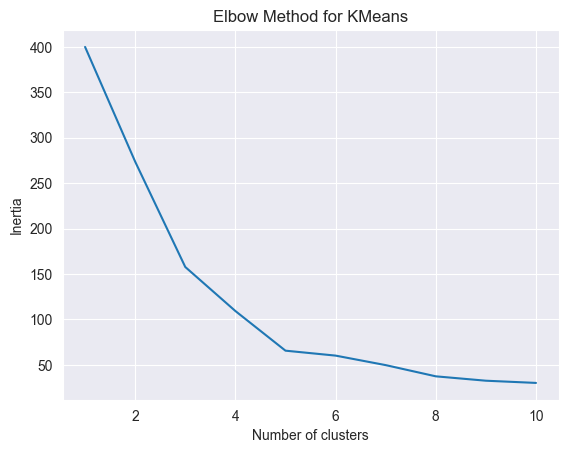

In [87]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), inertia)
plt.title("Elbow Method for KMeans")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()


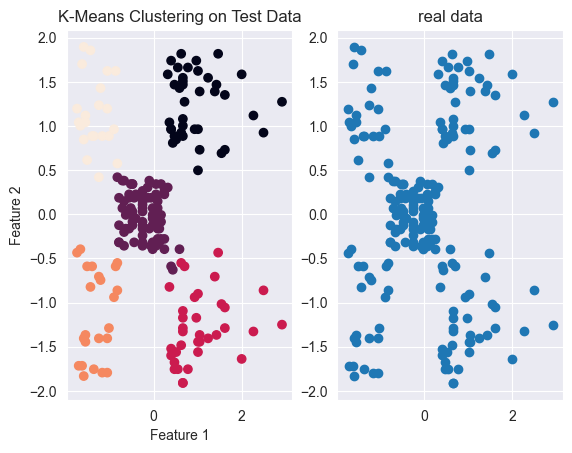

In [97]:
plt.subplot(1,2,1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans)
plt.title('K-Means Clustering on Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.subplot(1,2,2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1] )

plt.title('real data')
plt.show()


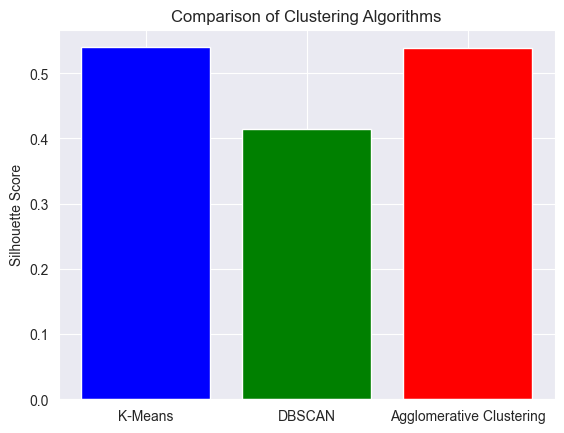

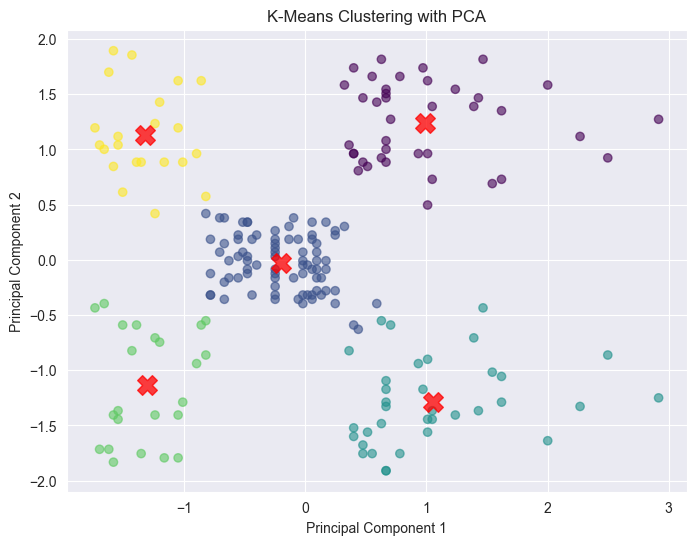

In [105]:
plt.bar(algorithms, scores, color=['blue', 'green', 'red'])
plt.ylabel('Silhouette Score')
plt.title('Comparison of Clustering Algorithms')
plt.show()


# ترسیم K-Means
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_kmeans, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



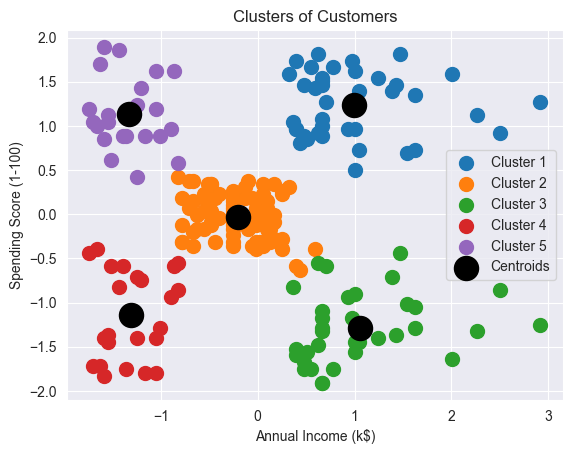

In [109]:
# تعداد خوشه‌ها از K-Means گرفته می‌شود
n_clusters = len(np.unique(y_kmeans))  # تعداد خوشه‌ها از y_kmeans که پیش‌بینی شده‌اند گرفته می‌شود

# حلقه برای رسم هر خوشه به صورت جداگانه
for i in range(n_clusters):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], s=100, label=f'Cluster {i+1}')

# رسم مراکز خوشه‌ها
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids')

# عنوان و برچسب‌ها
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# نمایش نمودار
plt.legend()
plt.show()


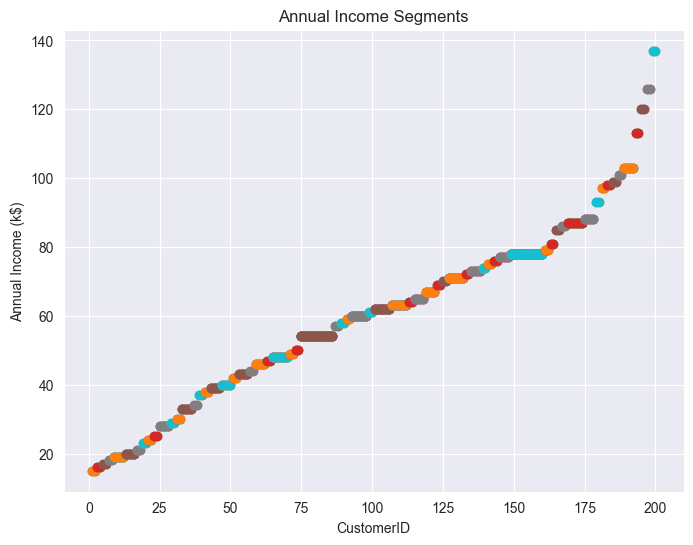

In [112]:
plt.figure(figsize=(8, 6))
for segment in df["Annual_Income_(k$)"]:
    segment_data = df[df["Annual_Income_(k$)"] == segment]
    plt.scatter(segment_data["CustomerID"], segment_data["Annual_Income_(k$)"], label = f"{segment} Income")
plt.xlabel('CustomerID')
plt.ylabel('Annual Income (k$)')
plt.title('Annual Income Segments')
# plt.legend()
plt.show()

In [113]:
df['cluster'] = y_kmeans
df.head(10)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
5,6,Female,22,17,76,4
6,7,Female,35,18,6,3
7,8,Female,23,18,94,4
8,9,Male,64,19,3,3
9,10,Female,30,19,72,4
